In [1]:
import matplotlib.pylab as plt
import numpy as np

REVT_FULL=7.05826
REVT_HALF=3.40457


d=0.9
sig=d/2**(1./6.)
scale_f=1./sig

scale_f_H = scale_f/(scale_f)**2

degree_sign= u'\N{DEGREE SIGN}'
def set_angles_x(ax, angles, ax_in_rad=False):
    if ax_in_rad:
        ax.set_xticks([a/180.*np.pi for a in angles])
    else:
        ax.set_xticks([a for a in angles])
    ax.set_xticklabels([u"{0:.0f}{1}".format(a, degree_sign) for a in angles])

def set_angles_y(ax, angles, ax_in_rad=False):
    if ax_in_rad:
        ax.set_yticks([a/180.*np.pi for a in angles])
    else:
        ax.set_yticks([a for a in angles])
    ax.set_yticklabels([u"{0:.0f}{1}".format(a, degree_sign) for a in angles])


In [2]:
#Energies with radius=1
energy_twist = lambda x,y: (np.sin(x)*np.cos(x)-np.sin(y)*np.cos(y))**2
energy_bend  = lambda x,y: (np.sin(x)*np.sin(x)-np.sin(y)*np.sin(y))**2
psi_c = lambda curvature: np.arcsin(np.sqrt(curvature))

# for 2t0/sqrt(1 - sqrt(1 - 4 t0^2)) < 0 
psi_t1 = lambda x: np.arctan2(-2*x/(np.sqrt(1.-np.sqrt(1.-4.*x**2))),
                             -np.sqrt(1.-np.sqrt(1.-4.*x**2)))
psi_t2 = lambda x: np.arctan2(-2*x/(np.sqrt(1.+np.sqrt(1.-4.*x**2))),
                             -np.sqrt(1.+np.sqrt(1.-4.*x**2))) 

# for 2t0/sqrt(1 - sqrt(1 - 4 t0^2)) > 0                              
psi_t3 = lambda x: np.arctan2(2*x/(np.sqrt(1.-np.sqrt(1.-4.*x**2))),
                             np.sqrt(1.-np.sqrt(1.-4.*x**2)))
psi_t4 = lambda x: np.arctan2(2*x/(np.sqrt(1.+np.sqrt(1.-4.*x**2))),
                             np.sqrt(1.+np.sqrt(1.-4.*x**2)))

                        
psi = np.linspace(-np.pi/2,3*np.pi/4,100)

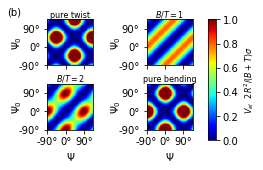

In [4]:
angles=[-90,0,90]

fig = plt.figure(figsize=(REVT_HALF,2.1))
ax = plt.subplot(221)
ax.text(0.0,0.95, r'(b)', transform=fig.transFigure)

q = np.linspace(0.001,200,100)
psi0 = psi.copy()
vm = 1.
H = [1.*energy_twist(psi, a0)+0.*energy_bend(psi, a0) for a0 in psi0]
H = np.vstack(H)/(1.+0.)*2
l = ax.matshow(H*scale_f_H, aspect="auto",origin="lower", cmap = plt.cm.jet,
           extent=[psi[0]/np.pi*180,psi[-1]/np.pi*180,
                   psi0[0]/np.pi*180,psi0[-1]/np.pi*180], interpolation='None',
              vmin=0, vmax=vm)

ax.set_ylabel(r"$\Psi_0$",labelpad=-5.0)
ax.set_title(r"pure twist", pad=0.0, fontsize=8)
plt.gca().xaxis.tick_bottom()
set_angles_x(ax, angles)
set_angles_y(ax, angles)
ax.set_xticklabels([])
ax.set_aspect("equal")

ax = plt.subplot(222)

q = np.linspace(0.001,200,100)
psi0 = psi.copy()
H = [1.0*energy_twist(psi, a0)+1.*energy_bend(psi, a0) for a0 in psi0]
H = np.vstack(H)/(1.+1.)*2
l = ax.matshow(H*scale_f_H, aspect="auto",origin="lower", cmap = plt.cm.jet,
           extent=[psi[0]/np.pi*180,psi[-1]/np.pi*180,
                   psi0[0]/np.pi*180,psi0[-1]/np.pi*180], interpolation='None',
              vmin=0, vmax=vm)

#ax.set_xlabel(r"$\Psi$")
ax.set_ylabel(r"$\Psi_0$", labelpad=-5.0)
ax.set_title(r"$B/T = 1$", pad=0.0, fontsize=8)
plt.gca().xaxis.tick_bottom()
set_angles_x(ax, angles)
set_angles_y(ax, angles)
ax.set_xticklabels([])
ax.set_aspect("equal")
#ax.set_ylabel("")

ax = plt.subplot(223)

q = np.linspace(0.001,200,100)
psi0 = psi.copy()
q=1/2
H = [q*energy_twist(psi, a0)+1.*energy_bend(psi, a0) for a0 in psi0]
H = np.vstack(H)/(1.+q)*2
l = ax.matshow(H*scale_f_H, aspect="auto",origin="lower", cmap = plt.cm.jet,
           extent=[psi[0]/np.pi*180,psi[-1]/np.pi*180,
                   psi0[0]/np.pi*180,psi0[-1]/np.pi*180], interpolation='None',
              vmin=0, vmax=vm)

ax.set_xlabel(r"$\Psi$")
ax.set_ylabel(r"$\Psi_0$", labelpad=-5.0)
ax.set_title(r"$B/T = 2$", pad=0.0, fontsize=8)
plt.gca().xaxis.tick_bottom()
set_angles_x(ax, angles)
set_angles_y(ax, angles)
ax.set_aspect("equal")
#ax.set_ylabel("")

ax = plt.subplot(224)
q = np.linspace(0.001,200,100)
psi0 = psi.copy()
H = [0.*energy_twist(psi, a0)+1.*energy_bend(psi, a0) for a0 in psi0]
H = np.vstack(H)/(0.+1.)*2
l = ax.matshow(H*scale_f_H, aspect="auto",origin="lower", cmap = plt.cm.jet,
           extent=[psi[0]/np.pi*180,psi[-1]/np.pi*180,
                   psi0[0]/np.pi*180,psi0[-1]/np.pi*180], interpolation='None',
              vmin=0, vmax=vm)

ax.set_xlabel(r"$\Psi$")
ax.set_ylabel(r"$\Psi_0$", labelpad=-5.0)
ax.set_title(r"pure bending", pad=0.0, fontsize=8)
plt.gca().xaxis.tick_bottom()
set_angles_x(ax, angles)
set_angles_y(ax, angles)
ax.set_aspect("equal")
#ax.set_ylabel("")

cax = fig.add_axes([0.82, 0.12, 0.03, 0.8])
cb = plt.colorbar(l, cax=cax)
cb.set_label(r"$V_{el}\ \ 2R^2/(B+T)\sigma$", fontsize=8)

plt.subplots_adjust(hspace=0.4,wspace=-0.4, bottom=0.19, top=0.92, left=-0.08, right=1.0)
plt.savefig("figs/potential.pdf")

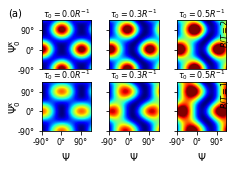

In [5]:
R=1.0
energy_twist2 = lambda x,y: (np.sin(x)*np.cos(x)/R-y)**2
energy_bend2  = lambda x,y: (np.sin(x)*np.sin(x)/R-y)**2


def plot_energy_twist(ax, twist, bt_ratio=1.0):
    vm=1.0
    q = np.linspace(0.001,200,100)
    psi0 = psi.copy()
    H = [bt_ratio**-1*energy_twist2(psi, twist)+1.0*energy_bend(psi, a0) for a0 in psi0]
    H = np.vstack(H)/(1.0 + bt_ratio**-1)*2.
    l = ax.matshow(H*scale_f_H, aspect="auto",origin="lower", cmap = plt.cm.jet,
           extent=[psi[0]/np.pi*180,psi[-1]/np.pi*180,
                   psi0[0]/np.pi*180,psi0[-1]/np.pi*180], interpolation='None',
              vmin=0, vmax=vm)

    ax.set_xlabel(r"$\Psi$")
    ax.set_ylabel(r"$\Psi_0^\kappa$", labelpad=-5.0)
    ax.set_title(f"$\\tau_0 = {twist*R} R^{{-1}}$", pad=0.0, fontsize=8)
    plt.gca().xaxis.tick_bottom()
    set_angles_x(ax, angles)
    set_angles_y(ax, angles)
    ax.set_aspect("equal")
    return l
    
fig = plt.figure(figsize=(REVT_HALF,2.1))
ax = plt.subplot(231)
ax.text(0.0,0.95, r'(a)', transform=fig.transFigure)
plot_energy_twist(ax, 0.0/R, 2)
ax.set_xlabel("")
ax.set_xticks([])
ax.tick_params(labelsize=8) 

ax = plt.subplot(232)
plot_energy_twist(ax, 0.3/R, 2)
ax.set_ylabel(""); ax.set_xlabel("")
ax.set_xticks([])
ax.set_yticklabels([])
ax.tick_params(labelsize=8) 

ax = plt.subplot(233)
plot_energy_twist(ax, 0.5/R, 2)
ax.set_ylabel(""); ax.set_xlabel("")
ax.set_xticks([])
ax.set_yticklabels([])
ax.text(100,25, r"$B/T = 2$",fontsize=8, rotation=90)
ax.tick_params(labelsize=8) 

## 2nd row
ax = plt.subplot(234)
plot_energy_twist(ax, 0/R, 1)
ax.tick_params(labelsize=8) 

ax = plt.subplot(235)
plot_energy_twist(ax, 0.3/R, 1)
ax.set_ylabel("")
ax.set_yticklabels([])
ax.tick_params(labelsize=8) 

ax = plt.subplot(236)
l = plot_energy_twist(ax, 0.5/R, 1)
ax.set_ylabel("")
ax.set_yticklabels([])
ax.tick_params(labelsize=8) 
ax.text(100,25, r"$B/T = 1$",fontsize=8, rotation=90)


plt.subplots_adjust(hspace=0.25,wspace=0.25, bottom=0.19, top=0.92)

plt.savefig("figs/potential_fixed_tw_6.pdf")
# E = B(sin^2(psi)- sin^2(psi_0^k) )+ T(sin(psi)cos(psi)-sin(psi_0)cos(psi_0))

## Cluster formation and Helix Angle

In [33]:
%matplotlib inline
import pandas as pd
import pickle
import os
%matplotlib inline
wdir = "/Data/ias-2/rode/spiral/jureca/alpha_scan/"

import glob
from scipy.stats import binned_statistic

import os 
from shutil import copy

with pd.HDFStore(wdir + "/results.h5") as store:
    results = store.get("v5")
for name, df in results.iterrows():
    a0 = np.arcsin(np.sqrt(df.R*df.b0))
    twist = np.sin(a0)*np.cos(a0)/df.R
    bend = np.sin(a0)**2/df.R
    if np.abs(df.t0 - twist) < 0.001:
        results.loc[name, "alpha0"] = a0

results['alpha'] = round(results.alpha0/np.pi*180,1)    


def get_dynamics(df):
    path = os.path.join('.', "postprocess", f"{df.name}.pickle")
    try:
        with open(path, "rb") as fp:
            data = pickle.load(fp)
    except FileNotFoundError:
        copy(os.path.join(wdir, "postprocess", f"{df.name}.pickle"), path)
        with open(path, "rb") as fp:
            data = pickle.load(fp)
        
    angles = {cidx: orients["orients"][1].values for cidx, orients in data["angles"].items() if len(orients["orients"]) }
    growth = data["cluster_growth"]
    growth.index = growth.index*1e-3
    return angles, growth



### Cluster Size

In [9]:
import shelve
data = shelve.open("cluster_sizes.dat")
cluster = data["pf05"] 
cluster_with_bend = data["pf05_w_el"] 


# Code to generate cluster sizes from simulation data
'''
ts05 = results.query("bend_rigidity==0.0 and twist_rigidity==0.0 and packing_fraction==0.5and R==50").sort_values("epsilon")
ts05_wEel = results.query("bend_rigidity==5000 and twist_rigidity==5000 and packing_fraction==0.5 and R==50").sort_values("epsilon")

cluster = {}
ts05_wEel_s = ts05_wEel[round(ts05_wEel.b0, 4) == 0.0069]
for name, df in ts05_wEel_s.iterrows():
    #if '2eps' not in name:
    #    continue
    alphas, growth = get_dynamics(df)
    d = growth.iloc[-1]
    Nmax = int(d.cluster_size_max)
    
    cluster_sizes = []
    for idx in range(1,Nmax+1):
        key = f"N_{idx}"
        if key in d:b
            cluster_sizes.extend([idx]*int(d[key])*idx)
    cluster[df.epsilon] = cluster_sizes

data = shelve.open("cluster_sizes.dat")
data["pf05_w_el"] = cluster
data.close()
'''

'\nts05 = results.query("bend_rigidity==0.0 and twist_rigidity==0.0 and packing_fraction==0.5and R==50").sort_values("epsilon")\nts05_wEel = results.query("bend_rigidity==5000 and twist_rigidity==5000 and packing_fraction==0.5 and R==50").sort_values("epsilon")\n\ncluster = {}\nts05_wEel_s = ts05_wEel[round(ts05_wEel.b0, 4) == 0.0069]\nfor name, df in ts05_wEel_s.iterrows():\n    #if \'2eps\' not in name:\n    #    continue\n    alphas, growth = get_dynamics(df)\n    d = growth.iloc[-1]\n    Nmax = int(d.cluster_size_max)\n    \n    cluster_sizes = []\n    for idx in range(1,Nmax+1):\n        key = f"N_{idx}"\n        if key in d:b\n            cluster_sizes.extend([idx]*int(d[key])*idx)\n    cluster[df.epsilon] = cluster_sizes\n\ndata = shelve.open("cluster_sizes.dat")\ndata["pf05_w_el"] = cluster\ndata.close()\n'

In [10]:
a = []
for eps in range(1,23):
    a.append((eps, cluster.get(eps)))
a = np.array(a)

a_with_el = []
for eps, c in cluster_with_bend.items():
    a_with_el.append((eps, c))
a_with_el = np.array(a_with_el)

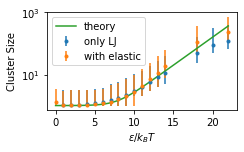

In [11]:
fig = plt.figure(figsize=(REVT_HALF,1.8))
cb = [0.55764706, 0.55764706, 0.81054979, 1.]
csm = np.array([(eps,np.mean(cs), (np.mean(cs) - np.percentile(cs, 25), 
                np.percentile(cs, 75) + np.mean(cs)))
                for eps, cs in zip(a.T[0],a.T[1]) if cs])
err = np.vstack(csm.T[2]).T
plt.errorbar(csm.T[0], csm.T[1], err, fmt='.', label='only LJ')

csm = np.array([(eps,np.mean(cs), (np.mean(cs) - np.percentile(cs, 25), 
                np.percentile(cs, 75) + np.mean(cs)))
                for eps, cs in zip(a_with_el.T[0],a_with_el.T[1])
                if cs])

err = np.vstack(csm.T[2]).T

plt.errorbar(csm.T[0], csm.T[1],err, fmt='.', label='with elastic')


xx3 = np.linspace(0,22)
plt.plot(xx3, np.sqrt(1+4*0.15*np.exp(5/6*xx3-6)), 
         label='theory')

plt.yscale("log")
plt.xlabel(r"$\epsilon/k_BT$")
plt.ylabel(r"Cluster Size")
plt.legend()
plt.savefig("figs/clustering_start_mean.pdf")

### Helix Angle

In [29]:


def plot_hist(df, a, ax, label, shift=0):    
    psi = np.linspace(-np.pi/2,np.pi/2, 50*10) + shift
    x = (psi[:-1] + psi[1:])/2
    psi = psi[::10]
    
    H = df.twist_rigidity*energy_twist(x, df.alpha0) \
        + df.bend_rigidity*energy_bend(x, df.alpha0)
    q = np.e**(-H/df.R**2)
    pl, = ax.plot(x, q/sum(q)/np.diff(x)[0],"--",
            label=label,
                 lw=1)
    
    _ = ax.hist(a, bins=psi, density=True, color = pl.get_color(), alpha=1.0,
               histtype='step', lw=1,)
    set_angles_x(ax, np.linspace(-90, 90, 5), ax_in_rad=True)
    print(label,np.mean(a), np.std(a))

    

$\Psi_0 = 0^\circ$ -0.1670442430762811 0.9853542216246891
$\Psi_0 = 12^\circ$ 0.20634712815351358 0.2603442964648643
$\Psi_0 = 30^\circ$ 0.5253427874544595 0.2597710761060168
$\Psi_0 = 36^\circ$ -0.04013602853608378 0.8677926451865693
$\Psi_0 = 36^\circ$ 0.6389733330940228 0.29445378267047934
$\Psi_0 = 36^\circ$ 0.17969113119365795 0.9847173483853348
$\Psi_0 = 36^\circ$ -0.03426891228462976 1.0150567841577576
$\Psi_0 = 48^\circ$ 0.8305952904507238 0.26046320859912964
$\Psi_0 = 66^\circ$ 0.9857476517437931 0.6432969823210819
$\Psi_0 = 0^\circ$ -0.1670442430762811 0.9853542216246891
$\Psi_0 = 12^\circ$ 0.09322839793735646 0.21852777872251886
$\Psi_0 = 30^\circ$ 0.4817545250782761 0.15773541376597383
$\Psi_0 = 42^\circ$ 0.728696593830197 0.11505233245412035
$\Psi_0 = 60^\circ$ 1.0494871843025821 0.3117534751871854
$\Psi_0 = 78^\circ$ 0.40862984540027797 1.315082327673047
$\Psi_0 = 0^\circ$ 0.0037272482978331902 0.979310013727372
$\Psi_0 = 18^\circ$ 0.7747266865356658 0.3384092628726742
$\

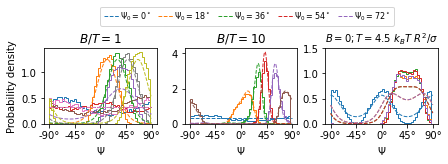

In [34]:
fig = plt.figure(figsize=(REVT_FULL,1.2))
sel = results.query("epsilon==22 and bend_rigidity==1*twist_rigidity and alpha0 >= 0 and packing_fraction > 0.6 and R==30 ").sort_values("alpha0")#
ax = plt.subplot(131)
ax.set_title(r"$B/T=1$")
for name, df in list(sel.iterrows())[:-3:3]:
    angles, growth = get_dynamics(df)
    a = [a for aa in angles.values() for a in aa if len(aa)]
    plot_hist(df, a, ax, r"$\Psi_0 = {:.0f}^\circ$".format(df.alpha0/np.pi*180))
#plt.legend(fontsize=8, ncol=2)

plt.xlabel(r"$\Psi$")
plt.ylabel("Probability density")

sel = results.query("epsilon==22 and bend_rigidity==10*twist_rigidity and alpha0 >= 0 and packing_fraction > 0.6 and R==30 ").sort_values("alpha0")#
ax = plt.subplot(132)
ax.set_title(r"$B/T=10$")
for name, df in list(sel.iterrows())[:-3:3]:
    angles, growth = get_dynamics(df)
    a = [a for aa in angles.values() for a in aa if len(aa)]
    plot_hist(df, a, ax, r"$\Psi_0 = {:.0f}^\circ$".format(df.alpha0/np.pi*180))
#plt.legend(fontsize=8, ncol=2)

plt.xlabel(r"$\Psi$")
#plt.ylabel("Probability density")
sel = results.query("epsilon==22 and bend_rigidity==0 and twist_rigidity==5000 and alpha0 >= 0 and packing_fraction > 0.6 and R==30 ").sort_values("alpha0")#
ax = plt.subplot(133) 
for name, df in list(sel.iterrows())[:-3:3]:
    angles, growth = get_dynamics(df)
    a = [a for aa in angles.values() for a in aa if len(aa)]
    plot_hist(df, a, ax, r"$\Psi_0 = {:.0f}^\circ$".format(df.alpha0/np.pi*180))
twist_ren = scale_f*df.twist_rigidity/(df.R*scale_f)**2 #use sigma!
ax.set_title(f"$B=0; T={twist_ren:.1f}$ " r"$k_BT\ R^2/\sigma$", fontsize=10)
plt.legend(fontsize=8, ncol=8, handletextpad=0, 
           columnspacing=1.0, loc=(-2.0, 1.3))
plt.ylim(0,1.5)
plt.xlabel(r"$\Psi$")
fig.subplots_adjust(wspace=0.25, top=1.0)
plt.savefig("figs/psi_probability_equal.pdf")

In [35]:
sel2 = []
for name, df in results.iterrows():
    if 'vary_strength22_' in name:
        sel2.append(df)
sel2 = pd.DataFrame(sel2)
sel2.sort_values('bend_rigidity', inplace=True)
sel2.sort_values('part_ava_cluster_size', inplace=True)
sel2 = sel2.loc[~sel2.index.duplicated(keep='first')]

B=0.01 -0.007738596450262891 0.9349532197655778
B=0.10 0.6128656546863263 0.43869488514525373
B=0.50 0.6409697107091459 0.3315259635857506
B=1.00 0.6336000932702782 0.31701117354085234
B=2.00 0.621622470902664 0.29584888935357206
B=3.00 0.6303844013571996 0.28081568988122496
B=4.00 0.6260893440896347 0.27251826666461176
B=5.00 0.6358041029007496 0.2644914334668079


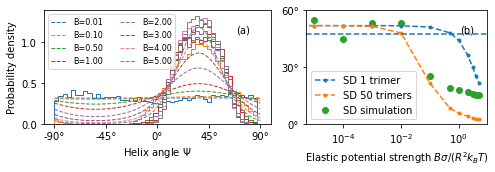

In [36]:
shift = np.pi/4


sel3 = sel2.query('packing_fraction==0.5').sort_values('bend_rigidity')
psi = np.linspace(-np.pi/2,np.pi/2, 1000) + shift
x = (psi[:-1] + psi[1:])/2
for name, df in list(sel3.iterrows()):
    angles, growth = get_dynamics(df)
    a = [a for aa in angles.values() for a in aa if len(aa)]

    H = df.twist_rigidity*energy_twist(x, df.alpha0) \
        + df.bend_rigidity*energy_bend(x, df.alpha0)
    q = np.e**(-H/df.R**2)
    Z = sum(q)
    ew = np.sum(q*x/Z)
    ew_sq =  np.sum(q*(x-ew)**2/Z)
    sel3.loc[name,'ew'] = ew 
    sel3.loc[name,'ew_sq'] = ew_sq 
    H = df.twist_rigidity*energy_twist(x, df.alpha0) \
        + df.bend_rigidity*energy_bend(x, df.alpha0)
    q = np.e**(-H*50/df.R**2)
    Z = sum(q)
    ew2 = np.sum(q*x/Z)
    ew2_sq =  np.sum(q*(x-ew2)**2/Z)
    sel3.loc[name,'ew2'] = ew2
    sel3.loc[name,'ew2_sq'] = ew2_sq
    sel3.loc[name, 'mean'] = np.mean(a)
    sel3.loc[name, 'variance'] = np.var(a)






f, (ax, bx) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 0.8]},
                           figsize=(REVT_FULL,2.5))
ax.text(0.85,0.8, r'(a)', transform=ax.transAxes)

for name, df in list(sel3.iterrows())[4:]:
    angles, growth = get_dynamics(df)
    a = [a for aa in angles.values() for a in aa if len(aa)]
    plot_hist(df, a, ax, f"B={df.bend_rigidity/df.R**2:.2f}")
    
ax.legend(fontsize=8, ncol=2)
ax.set_xlabel(r"Helix angle $\Psi$")
ax.set_ylabel(r"Probability density")

twist_ren = scale_f*sel3.bend_rigidity/(sel3.R*scale_f)**2 #use sigma!

bx.text(0.85, 0.8, r'(b)', transform=bx.transAxes)
bx.plot(sel3.bend_rigidity/sel3.R**2,  np.sqrt(sel3.ew_sq), '.--', label='SD 1 trimer')
bx.plot(sel3.bend_rigidity/sel3.R**2,  np.sqrt(sel3.ew2_sq), '.--', label='SD 50 trimers')
bx.plot(sel3.bend_rigidity/sel3.R**2, np.sqrt(sel3['variance']), 'o', label='SD simulation', 
         zorder=-1)
bx.axhline(sel.alpha0.mean(), linestyle='--')
#plt.legend(fontsize=8, ncol=1)
set_angles_y(bx,  [0, 30, 60], ax_in_rad=True)
bx.set_xlabel(r'Elastic potential strength $B\sigma/(R^2k_BT)$')
bx.set_xticks([])
bx.set_xscale('log')
bx.legend()

#plt.ylabel("Probability density")
plt.tight_layout()
plt.subplots_adjust(hspace=0.18)

plt.savefig("figs/psi_probability_eps_R.pdf")

## Growth Dynamics 

eps18_22/eps18_a00.0_b5000t5000_pf0.7_R10.0_s46                    10.0
eps18_22/eps18_a00.10471975511965977_b5000t5000_pf0.7_R10.0_s11    10.0
eps18_22/eps18_a00.20943951023931953_b5000t5000_pf0.7_R10.0_s75    10.0
eps18_22/eps18_a00.3141592653589793_b5000t5000_pf0.7_R10.0_s97     10.0
eps18_22/eps18_a00.41887902047863906_b5000t5000_pf0.7_R10.0_s18    10.0
eps18_22/eps18_a00.5235987755982988_b5000t5000_pf0.7_R10.0_s71     10.0
eps18_22/eps18_a00.6283185307179586_b5000t5000_pf0.7_R10.0_s47     10.0
eps18_22/eps18_a00.7330382858376183_b5000t5000_pf0.7_R10.0_s68     10.0
eps18_22/eps18_a00.8377580409572781_b5000t5000_pf0.7_R10.0_s53     10.0
eps18_22/eps18_a00.9424777960769379_b5000t5000_pf0.7_R10.0_s59     10.0
eps18_22/eps18_a01.0471975511965976_b5000t5000_pf0.7_R10.0_s12     10.0
eps18_22/eps18_a01.1519173063162573_b5000t5000_pf0.7_R10.0_s10     10.0
eps18_22/eps18_a01.2566370614359172_b5000t5000_pf0.7_R10.0_s48     10.0
eps18_22/eps18_a01.361356816555577_b5000t5000_pf0.7_R10.0_s46   

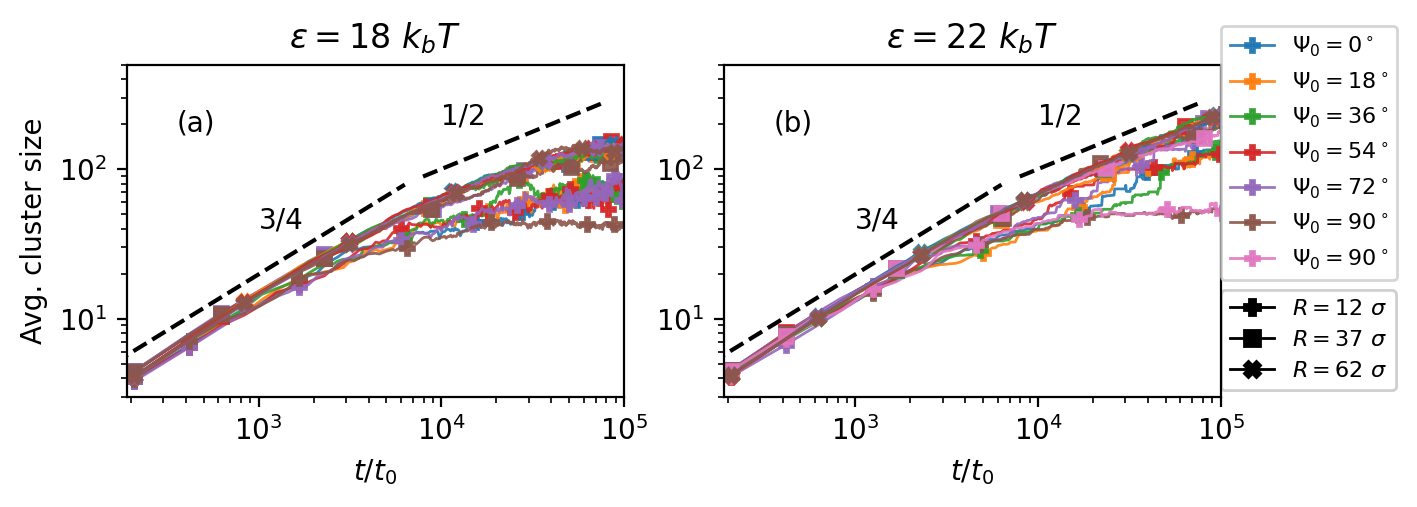

In [37]:
import matplotlib.lines as mlines

d=0.9
sig=d/2**(1./6.)
scale_f=1./sig

legend_elements = []

def plot_sel(sel, ax, show=True, marker='None'):
    print(sel.R,sorted(set(sel.alpha0))[0::3])
    for name, df in sel.iterrows():
            if df.alpha0 not in sorted(set(sel.alpha0))[0::3]:
                continue
            angles, cluster_growth = get_dynamics(df)
            cluster_growth.index = cluster_growth.index/3/0.08 #only use the larger pf
            if show:
                label=r"$\Psi_0={:.0f}^\circ$".format(df.alpha0/np.pi*180)
            else:
                label=''
            U = 1.0#2*np.pi*df.R
            plt.plot(cluster_growth.part_ava_cluster_size/U, label=label,  markersize=5, lw=1,
                    marker=marker, markevery=(len(legend_elements)/4 ,0.2),alpha=0.9)
    #label=f"$\epsilon={set(sel.epsilon).pop()}\ k_BT$"))
    R = set(sel.R)
    assert len(R) == 1
    R = R.pop()*scale_f
    legend_elements.append(mlines.Line2D([], [], c='k', marker=marker, lw=1,
                                         label=f"$R={R:.0f}\ \sigma$"))
                                          


fig = plt.figure(figsize=(REVT_FULL,2.2), dpi=200)
ax = plt.subplot(121)
ax.set_title(f"$\epsilon=18\ k_bT$")
ax.text(0.1,0.8, r'(a)', transform=ax.transAxes)

sel = results.query("R==10 and epsilon==18 and alpha0 >=0 and packing_fraction > 0.5 and bend_rigidity==twist_rigidity and bend_rigidity==5000").sort_values("alpha0")
sel = sel.loc[[name for name in sel.index if 'special' not in name]]
sel = sel.loc[~sel.index.duplicated(keep='last')]
plot_sel(sel, ax, show=False, marker='P')  

ax.set_prop_cycle(None)
sel = results.query("R==30 and epsilon==18 and packing_fraction > 0.5 and alpha0 >=0  and bend_rigidity==twist_rigidity and bend_rigidity==5000").sort_values("alpha0")
sel = sel.loc[[name for name in sel.index if 'special' not in name]]
sel = sel.loc[~sel.index.duplicated(keep='last')]
plot_sel(sel, ax, show=False, marker='s')   

ax.set_prop_cycle(None)
sel = results.query("R==50 and epsilon==18 and packing_fraction > 0.5 and alpha0 >=0  and bend_rigidity==twist_rigidity and bend_rigidity==5000").sort_values("alpha0")
sel = sel.loc[[name for name in sel.index if 'special' not in name]]
sel = sel.loc[~sel.index.duplicated(keep='last')]
plot_sel(sel, ax, show=False, marker='X')  


plt.ylabel("Avg. cluster size")
plt.xlabel(r"$t/t_0$")

plt.xscale("log")
plt.yscale("log")


## Scaling laws
ls = np.logspace(1.8,3.8,100)
plt.plot(ls, ls**0.75 /9, "--", c="k")
plt.annotate("3/4", xy=(1e3,40) )


ls = np.logspace(3.9,4.9,100)
plt.plot(ls, ls**0.5, "--", c="k")
plt.annotate("1/2", xy=(10**4, 200) )
plt.xlim(1.9*10**2, 1e5)
plt.ylim(3, 5*10**2)

plt.xscale("log")
plt.yscale("log")
fl = plt.legend(handles=legend_elements, fontsize=8, loc=(2.2,0.02))
ax = plt.gca().add_artist(fl)
#plt.axhline(400)
#plt.plot(smul_data_18[0]/2, smul_data_18[1], ':', lw=4, color='cyan')

#plt.plot(smul_data_18_100[0]/2, smul_data_18_100[1])
#plt.plot(smul_data_18_1[0]/2, smul_data_18_1[1])

# ---------------------------------------
ax = plt.subplot(122)
ax.text(0.1,0.8, r'(b)', transform=ax.transAxes)
ax.set_title(f"$\epsilon=22\ k_bT$")
sel = results.query("R==10 and epsilon==22 and  alpha0 >=0 and packing_fraction > 0.5 and bend_rigidity==twist_rigidity and bend_rigidity==5000").sort_values("alpha0")
sel = sel.loc[[name for name in sel.index if 'special' not in name]]
sel = sel.loc[~sel.index.duplicated(keep='last')]
plot_sel(sel, ax, show=True, marker='P')  

ax.set_prop_cycle(None)
sel = results.query("R==30 and epsilon==22 and packing_fraction > 0.5 and alpha0 >=0  and bend_rigidity==twist_rigidity and bend_rigidity==5000").sort_values("alpha0")
sel = sel.loc[[name for name in sel.index if 'special' not in name]]
sel = sel.loc[~sel.index.duplicated(keep='last')]
plot_sel(sel, ax, show=False, marker='s')   
ax.set_prop_cycle(None)
sel = results.query("R==50 and epsilon==22 and packing_fraction > 0.5 and alpha0 >=0  and bend_rigidity==twist_rigidity and bend_rigidity==5000").sort_values("alpha0")
sel = sel.loc[[name for name in sel.index if 'special' not in name]]
sel = sel.loc[~sel.index.duplicated(keep='last')]
plot_sel(sel, ax, show=False, marker='X')  



#plt.legend(fontsize=8, ncol=8, loc=(-1.1,1.02))
plt.legend(fontsize=8, ncol=1, loc=(1.0,0.35))
#plt.ylabel("Avg. cluster size")
plt.xlabel(r"$t/t_0$")
plt.xscale("log")
plt.yscale("log")


## Scaling laws
##ls = np.logspace(1.0,3.0,100)
##plt.plot(ls, ls/10, "--", c="g")

ls = np.logspace(1.8,3.8,100)
plt.plot(ls, ls**0.75 /9, "--", c="k")
plt.annotate("3/4", xy=(1e3,40) )


ls = np.logspace(3.9,4.9,100)
plt.plot(ls, ls**0.5, "--", c="k")
plt.annotate("1/2", xy=(10**4, 200) )
plt.xlim(1.9*10**2, 1e5)
plt.ylim(3, 5*10**2)

#plt.plot(smul_data_22[0]/2, smul_data_22[1], ':', lw=4, color='cyan')

plt.xscale("log")
plt.yscale("log")
#plt.axhline(400)
#savefig("growth_all.pdf")


In [38]:
ex18 = results.loc['eps18_22/eps18_a00.6283185307179586_b5000t5000_pf0.7_R50_s52']
ex22 = results.loc['eps18_22/eps22_a00.6283185307179586_b5000t5000_pf0.7_R50_s96']

In [41]:
smul_data_18 = np.load("smu/smulokowski_combined_c0_10__18.npy")
smul_data_22 = np.load("smu/smulokowski_combined_c0_10__22.npy")

smul_data_18_100 = np.load("smu/smulokowski_combined_c0_100__18.npy")
smul_data_18_1 = np.load("smu/smulokowski_combined_c0_1__18.npy")

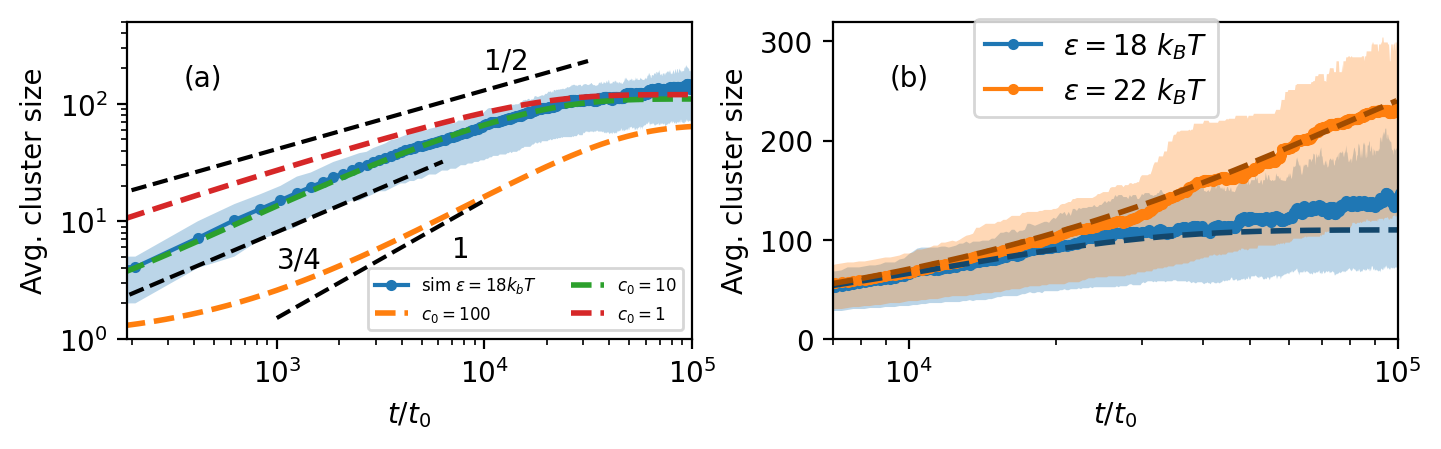

In [42]:
import matplotlib.colors as mc
import colorsys

def darker(color, amount=0.6):
    c = colorsys.rgb_to_hls(*mc.to_rgb(color))
    return colorsys.hls_to_rgb(c[0], amount*c[1], c[2])


fig = plt.figure(figsize=(REVT_FULL, 2.1), dpi=200)

ax = plt.subplot(121)
ax.text(0.1,0.8, r'(a)', transform=ax.transAxes)


angles, cluster_growth = get_dynamics(ex18)
cluster_growth.index = cluster_growth.index/3/0.08 #only use the larger pf
p, = ax.plot(cluster_growth.index, cluster_growth.part_ava_cluster_size, '.-',
             label=r'sim $\epsilon=18k_bT$')
std = cluster_growth.part_ava_cluster_size_std
ax.fill_between(cluster_growth.index, cluster_growth.cluster_size_p25, 
                cluster_growth.cluster_size_p75, alpha=0.3, facecolor=p.get_color())

plt.plot(smul_data_18_100[0]/2, smul_data_18_100[1], '--', label=r'$c_0=100$', lw=2)
plt.plot(smul_data_18[0]/2, smul_data_18[1], '--', label=r'$c_0=10$', lw=2)
plt.plot(smul_data_18_1[0]/2, smul_data_18_1[1], '--', label=r'$c_0=1$', lw=2)

## Scaling laws
ls = np.logspace(1.8,3.8,100)
ax.plot(ls, ls**0.75 /22, "--", c="k")
ax.annotate("3/4", xy=(1e3,4) )


ls = np.logspace(2.3,4.5,100)
ax.plot(ls, 1.3*ls**0.5, "--", c="k")
ax.annotate("1/2", xy=(10**4, 200) )

ls = np.logspace(3,4,100)
ax.plot(ls, 1.5*ls/1e3, "--", c="k")
ax.annotate("1", xy=(7*10**3, 5) )


plt.legend(fontsize=6, loc=4, ncol=2)
plt.xscale("log")
plt.yscale("log")
plt.xlim(1.9*10**2, 1e5)
plt.ylim(1, 5*10**2)



ax.set_ylabel("Avg. cluster size")
ax.set_xlabel(r"$t/t_0$")


# -----------------------------------
ax = plt.subplot(122)
ax.text(0.1,0.8, r'(b)', transform=ax.transAxes)
angles, cluster_growth = get_dynamics(ex18)
cluster_growth.index = cluster_growth.index/3/0.08 #only use the larger pf
p18, = ax.plot(cluster_growth.index, cluster_growth.part_ava_cluster_size, '.-',
             label=r'$\epsilon=18\ k_BT$')
std = cluster_growth.part_ava_cluster_size_std
ax.fill_between(cluster_growth.index, cluster_growth.cluster_size_p25, 
                 cluster_growth.cluster_size_p75, alpha=0.3, facecolor=p18.get_color())

angles, cluster_growth = get_dynamics(ex22)
cluster_growth.index = cluster_growth.index/3/0.08 #only use the larger pf
p22, = ax.plot(cluster_growth.index, cluster_growth.part_ava_cluster_size, '.-',
             label=r'$\epsilon=22\ k_BT$')
std = cluster_growth.part_ava_cluster_size_std
ax.fill_between(cluster_growth.index, cluster_growth.cluster_size_p25, 
                 cluster_growth.cluster_size_p75, alpha=0.3, facecolor=p22.get_color())

plt.plot(smul_data_18[0]/2, smul_data_18[1], '--', lw=2, c=darker(p18.get_color()))
plt.plot(smul_data_22[0]/2, smul_data_22[1], '--', lw=2, c=darker(p22.get_color()))
plt.legend(loc=(0.25, 0.7))
plt.xscale("log")
plt.yscale("linear")
plt.xlim(7*10**3, 1e5)
plt.ylim(0,320)
plt.ylabel("Avg. cluster size")
plt.xlabel(r"$t/t_0$")

plt.subplots_adjust(wspace=0.25, left=0.05, right=0.95)
plt.savefig('figs/different_c0_and_eps.pdf')

In [43]:
sel = []
for name in results.index:
    if 'special/packing_fractions' in name :
        sel.append(name)

/Local/rode/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/Local/rode/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Local/rode/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


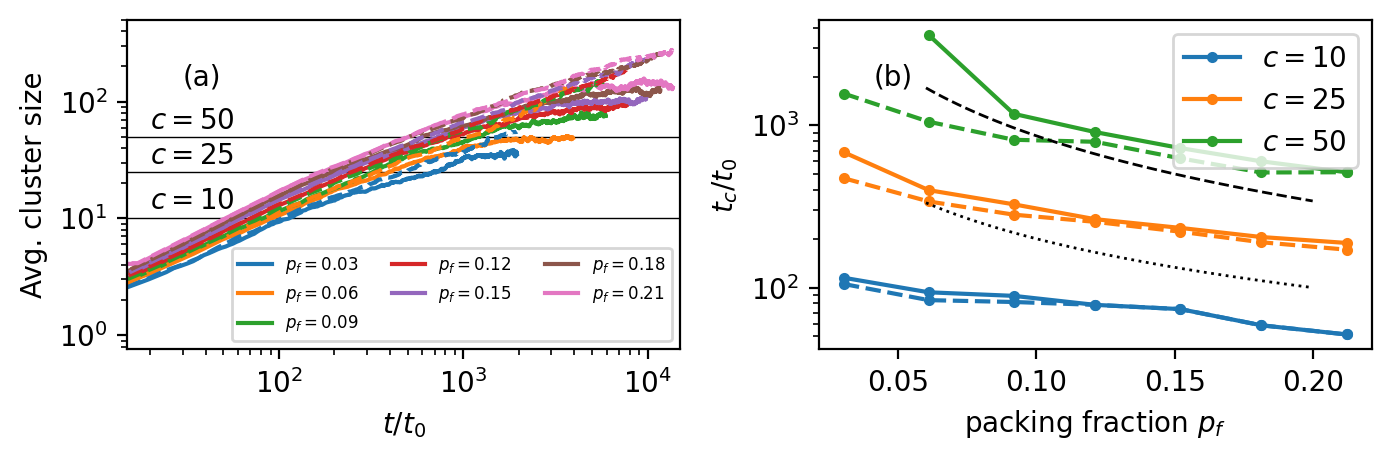

In [44]:
fig = plt.figure(figsize=(REVT_FULL, 2.4), dpi=200)

ax = plt.subplot(121)
ax.text(0.1,0.8, r'(a)', transform=ax.transAxes)

qq = results.loc[sel].query('epsilon==18').sort_values('packing_fraction')
A = 1250*314
d=0.9
sig=d/2**(1./6.)
scale_f=1./sig
At = 2.89*sig**2
for _, df in qq.iterrows():
    clusters,ts = get_dynamics(df)
    rho = ts.iloc[0].N_1/A
    ts.index = ts.index*3*rho
    plt.plot(ts.part_ava_cluster_size, '-',label=f"$p_f = {At*rho:.2f}$")
plt.legend(ncol=3, fontsize=6)
plt.xscale("log")
plt.yscale("log")

plt.gca().set_prop_cycle(None)
qq = results.loc[sel].query('epsilon==22').sort_values('packing_fraction')
for _, df in qq.iterrows():
    clusters,ts = get_dynamics(df)
    rho = ts.iloc[0].N_1/A
    ts.index = ts.index*3*rho
    plt.plot(ts.part_ava_cluster_size, '--', label=f"$p_f =  {At*rho:.2f}$")
plt.xscale("log")
plt.yscale("log")
plt.axhline(10, c='k', zorder=-2, lw=0.5)
plt.annotate(r'$c= 10$', (20, 12))
plt.axhline(25, c='k', zorder=-2, lw=0.5)
plt.annotate(r'$c= 25$', (20, 29))
plt.axhline(50, c='k', zorder=-2, lw=0.5)
plt.annotate(r'$c= 50$', (20, 58))

plt.xlim(15, 1.5*1e4)
plt.ylim(0, 5*10**2)

qq = results.loc[sel]
for name, df in qq.iterrows():
    clusters, ts = get_dynamics(df)
    rho = ts.iloc[0].N_1/A
    ts.index = ts.index*3*rho
    qq.loc[name, 'real_pf'] = rho*At
    idx = ts[ts.part_ava_cluster_size >= 10].index
    qq.loc[name, 'r10'] = idx[0] if len(idx) else None

    idx = ts[ts.part_ava_cluster_size >= 25].index
    qq.loc[name, 'r25'] = idx[0] if len(idx) else None
    
    idx = ts[ts.part_ava_cluster_size >= 50].index
    qq.loc[name, 'r50'] = idx[0] if len(idx) else None

plt.xlabel(r'$t/t_0$')
plt.ylabel('Avg. cluster size')


ax = plt.subplot(122)
ax.text(0.1,0.8, r'(b)', transform=ax.transAxes)

for name, df in qq.groupby('epsilon'):
    plt.gca().set_prop_cycle(None)
    df.sort_values('packing_fraction', inplace=True)
    s = '.-' if name==18 else '--.'
    plt.plot(df.real_pf, df.r10, s, label=r'$c = 10$')
    plt.plot(df.real_pf, df.r25, s, label=r'$c = 25$')
    plt.plot(df.real_pf, df.r50, s,label=r'$c = 50$')
    if name == 18:
        plt.legend()

ts = np.linspace(0.06, 0.2)
plt.plot(ts, ts**(-4/3)*40, '--', c='k', lw=1)
plt.plot(ts, ts**(-1)*20, ':', c='k', lw=1)
#plt.plot(ts, ts**(-1/2)*130, '--', c='k')

plt.xscale('linear')
plt.yscale('log')
plt.xlabel(r'packing fraction $p_f$')
plt.ylabel(r'$t_c/t_0$')
plt.tight_layout()
plt.savefig('figs/growth_varydensity.pdf')